# Parallel Monte Carlo runs
The example script below shows how to run SWIM in parallel on the PIK cluster or on your local CPUs, using the example of a Monte Carlo random parameter setting. It makes use of the project *cloning* functionality of SWIMpy and SLURM `sbatch` job submission that is executed in the background.

In [1]:
# hidden cell: code to setup
import swimpy, os
%matplotlib inline

project_path = os.path.join(os.path.dirname(swimpy.__file__), '../tests/project')
os.chdir(project_path)
if not os.path.exists('swimpy'):
    p = swimpy.project.setup()

Initialising a new modelmanager project in: .
with settings file in: ./swimpy/settings.py


In [2]:
import pandas as pd
import numpy as np

import swimpy

# number of runs
nruns = 10

# parameter and ranges (extend as needed)
parameter = {'ecal': (0.8, 1.2),
             'sccor': (0.1, 10),
             'smrate': (0.1, 0.6)}

# load the project instance
p = swimpy.Project()

# create list of project.catchment arguments
args = [{k: np.random.uniform(*b) for k, b in parameter.items()} for _ in range(nruns)]

# run and return set of runs
runs = p.cluster.run_parallel(args=args, files=['station_daily_discharge'])

/Users/wortmann/Desktop/source/swimpy/swimpy/utils.py:352: UserWarning: Using multiprocessing on 4 CPUs.
  warnings.warn(msg)


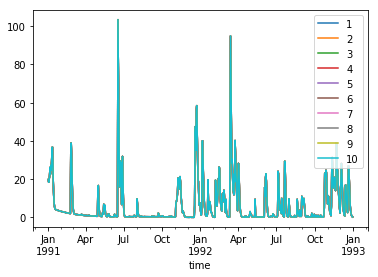

In [3]:
# unpack Blankenstein station_daily_discharge and plot
q = pd.DataFrame({r.id: r.station_daily_discharge['BLANKENSTEIN'] for r in runs})
q.plot()

The default SLURM settings may be extended like a normal dictionary. E.g.:

In [5]:
p.cluster_slurmargs
p.cluster_slurmargs.update({'qos': 'medium', 'time': '0:0:01'})
p.cluster_slurmargs

{'account': 'swim', 'qos': 'medium', 'time': '0:0:01'}